This is an example notebook

In [1]:
import numpy as np
from autogabi.analysis import GBStructure
from autogabi.plotting import render_ovito

In [2]:
gb = GBStructure('ovito', 'LSF_supercell_md3.lmp')
gb.delete_particles('O')
gb.perform_cna()
gb.set_analysis()
data = gb.data
gb_ions = gb.get_gb_atoms()

print(len(gb_ions))

C:\Users\alebon\sciebo\Data\LSF\05_polycrystal\Auto-GaBi\autogabi\analysis.py:36: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? Note that this will likely lead to conflicts with existing libraries in the Anaconda environment and loading of the OVITO module may subsequently fail with an error related to the Qt framework. In such a case, please uninstall the OVITO pip package first by running 'pip uninstall -y ovito PySide2' and then install the OVITO for Anaconda package using the correct command: 

    conda install --strict-channel-priority -c https://conda.ovito.org -c conda-forge ovito

Visit https://www.ovito.org/python-downloads/ for further installation instructions.
  from ovito.io import import_file


8590


In [3]:
gb2 = GBStructure('ovito', 'LSF_supercell_md3.lmp')

gb2.select_particles(gb_ions, expand=True, nearest_neighbors=1, invert=True, delete=True)
gb2.set_analysis()

In [4]:
print("Number of Sr:", len(gb2.get_type(2)))
gb_cations = sum(len(gb2.get_type(i))for i in [1, 2, 3])
print("Number of cations:", gb_cations)
print("A-site fraction of Sr:", gb2.get_fraction([2], [1, 2])*100, '%')
print("Percentage of oxygen:", gb2.get_fraction([4], [1, 2, 3, 4])*100, '%')

Number of Sr: 1170
Number of cations: 8590
A-site fraction of Sr: 26.828709011694567 %
Percentage of oxygen: 45.36666030655727 %


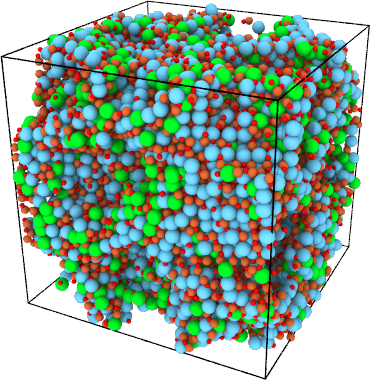

In [5]:
image = render_ovito(gb2.pipeline)
image.save("figure.png")

from IPython.core.display import Image
Image(filename='figure.png')